### Sumário

1. [Fast Fourier Transform](#1.-Fast_Fourier_Transform)
2. [Sinal de Áudio Simples](#2.-Sinal_de_Áudio_Simples)
3. [Sinal de Áudio Complexo](#3.-Sinal_de_Áudio_Complexo)
4. [Dado de Sismologia](#4.-Dado_de_Sismologia)

***********

## 1. Fast Fourier Transform

##### Texto escrito por André Nascimento

A Transformada de Fourier rápida (ou <i>fast fourier transform - fft</i>) consiste em um algorimo para calcular a DFT de uma sequência de forma eficiente. Foi descrita primeiramente em um artigo de [Cooley e Tukey em 1965](https://www.ams.org/journals/mcom/1965-19-090/S0025-5718-1965-0178586-1/S0025-5718-1965-0178586-1.pdf), e é um algoritmo de divisão e conquista que quebra a DFT recursivamente em DFTs menores e reduz a complexidade do problema de $O(n^2)$ para $O(nlogn)$, onde $n$ é o tamanho dos dados.

A FFT utiliza de simetrias na DFT para acelerar o seu cálculo. Com base na definição da DFT apresentada anteriormente, vamos calcular o seguinte:

$\large \displaystyle{X_{k+N} = \sum\limits_{n=0}^{N-1}x_n \cdot e^{-i2\pi (k+N)n/N}} = \sum\limits_{n=0}^{N-1}x_n \cdot e^{-i2\pi n} \cdot e^{-i2\pi kn/N} $

Note que $e^{-i\pi n} = e^{-i\pi} = 1$, portanto:

$\large \displaystyle{X_{k+N} = \sum\limits_{n=0}^{N-1}x_n \cdot e^{-i2\pi kn/N} = X_k} $

e, de forma geral

$X_k = X_{k \pm N} = X_{k \pm 2N} = \dots = X_{k \pm cN}$ para todo inteiro $c$.

Cooley e Tukey mostraram que podemos calcular a DFT de forma mais eficiente se dividirmos o problema em problemas menores. Vamos dividir a série temporal em duas:

$\large \displaystyle{X_k = \sum\limits_{n=0}^{N-1}x_n \cdot e^{-i2\pi kn/N}} \\ \large = \sum\limits_{m=0}^{N/2-1}x_{2m}\cdot e^{-i2\pi k(2m)/N} + \sum\limits_{m=0}^{N/2-1} x_{2m+1}\cdot e^{-i2\pi k(2m+1)/N} \\ \large = \sum\limits_{m=0}^{N/2-1} x_{2m} \cdot e^{-i2\pi km/(N/2)} + e^{-i2\pi k/N} + \sum\limits_{m=0}^{N/2-1}x_{2m+1} \cdot e^{-i2\pi km/(N/2)}$

Nota-se que os dois termos menores que possuem apenas metade do tamanho $\frac{N}{2}$ são duas DFTs menores. Para cada termo, $0 \le m \le \frac{N}{2}$, mas $0 \le k \le N$, e metade dos valores serão os mesmos devido à simetria discutida anteriormente. Não há necessidade de parar por aqui, e poderíamos continuar dividindo cada termo pela metade até chegarmos aos últimos dois termos.

***********

## 2. Sinal de Áudio Simples

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
!git clone https://github.com/GuilhermeZakarewicz/AnaliseSinais

In [ ]:
cd AnaliseSinais/Aulas

Vamos definir uma função que cria senóides.

In [2]:
def generate_sine_wave(freq, sample_rate, duration):
    """
    Função para criar uma senóide
    Entrada:
    - freq: frequência em Hz
    - sample_rate: taxa de amostragem
    - duration: duração em segundos
    Saída:
    - x: array, eixo dos tempos
    - y: array, eixo das amplitudes
    """
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False) #criando eixo do tempo
    
    frequencies = x * freq
    y = np.sin((2 * np.pi) * frequencies) #criando o seno
    
    return x, y

Como exemplo, vamos gerar um seno simples de frequência 2 Hz.

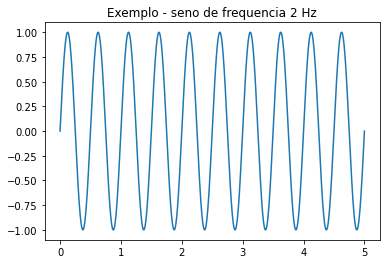

In [3]:
sample_rate = 44100 # Hz
duration = 5 # Segundos
frequencia = 2 # Hz

x, y = generate_sine_wave(frequencia, sample_rate, duration)
plt.plot(x, y)
plt.title("Exemplo - seno de frequencia 2 Hz")
plt.show()

Criando uma senóide com duas frequências diferentes (uma alta e uma baixa).

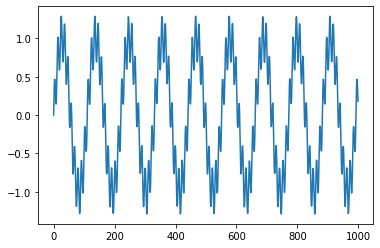

In [4]:
x, nice_tone = generate_sine_wave(400, sample_rate, duration)
x, noise_tone = generate_sine_wave(4000, sample_rate, duration)
noise_tone = noise_tone * 0.3

mixed_tone = nice_tone + noise_tone
plt.plot(mixed_tone[:1000])
plt.show()

Normalizando o sinal. Temos que passar nossa array para o formato 16-bit, que tem um intervalo de -32768 a 32767.

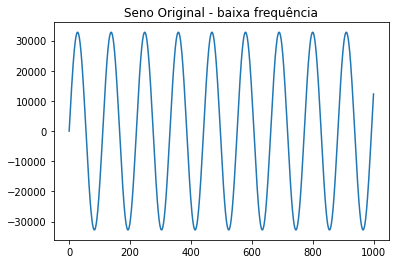

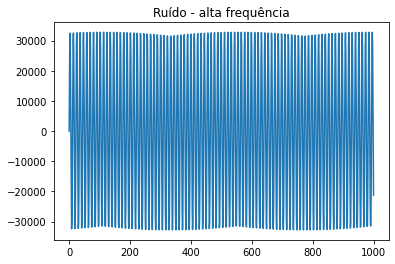

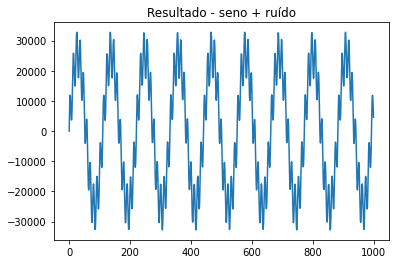

In [5]:
normalized_nicetone =  np.int16((nice_tone / nice_tone.max()) * 32767)
normalized_noisetone = np.int16((noise_tone / noise_tone.max()) * 32767)
normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)


plt.plot(normalized_nicetone[:1000])
plt.title("Seno Original - baixa frequência")
plt.show()

plt.plot(normalized_noisetone[:1000])
plt.title("Ruído - alta frequência")
plt.show()

plt.plot(normalized_tone[:1000])
plt.title("Resultado - seno + ruído")
plt.show()

In [6]:
from scipy.io.wavfile import write

#Criando os arquivos de áudio
write("../Dados/audio_original.wav", sample_rate, normalized_nicetone)
write("../Dados/audio_ruido.wav", sample_rate, normalized_noisetone)
write("../Dados/audio_resultante.wav", sample_rate, normalized_tone)

In [ ]:
!pip install pydub

In [7]:
from IPython.display import Audio # biblioteca para escutar os audios no notebook
from pydub import AudioSegment # Biblioteca para converter formatos de áudio

D:\Arquivos\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


Áudio Original


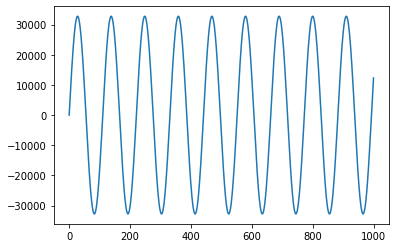

In [8]:
print("Áudio Original")

plt.plot(normalized_nicetone[:1000])
plt.show()

Audio(str("../Dados/audio_original.wav"))

Áudio Ruído


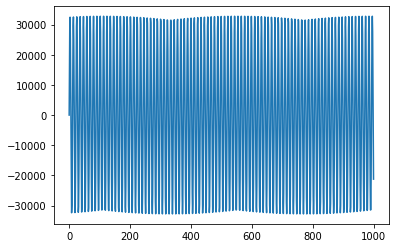

In [9]:
print("Áudio Ruído")

plt.plot(normalized_noisetone[:1000])
plt.show()

Audio(str("../Dados/audio_ruido.wav"))

Áudio Resultante


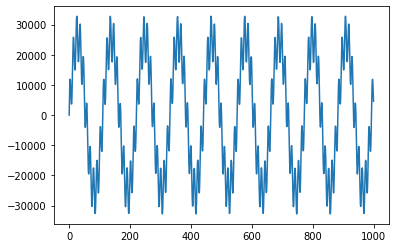

In [10]:
print("Áudio Resultante")

plt.plot(normalized_tone[:1000])
plt.show()

Audio(str("../Dados/audio_resultante.wav"))

Vamos aplicar a fft no nosso dado usando a biblioteca ``scipy``. Assim, passamos nosso dado no domínio do tempo para o domínio da frequência.

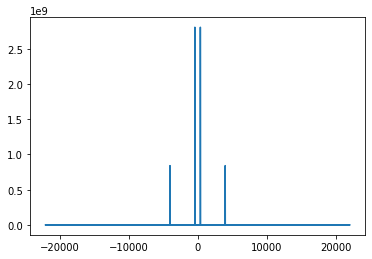

In [11]:
from scipy.fft import fft, fftfreq

# Número de amostras do nosso sinal
N = sample_rate * duration

yf = fft(normalized_tone) #fast-fourier transform do nosso sinal
xf = fftfreq(N, 1 / sample_rate) #criando o eixo da frequência

plt.plot(xf, np.abs(yf))
plt.show()

Como nosso sinal é real e positivo, há uma simetria dos eixos positivo e negativo das frequências. Observe que os pulsos no eixo positivo se repetem no eixo negativo. Assim, podemos considerar somente metade do nosso sinal, o que agiliza as contas. Para isso, vamos usar a função ``rfft``.

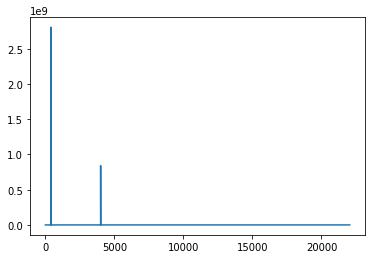

In [12]:
from scipy.fft import rfft, rfftfreq

yf = rfft(normalized_tone)
xf = rfftfreq(N, 1 / sample_rate)

plt.plot(xf, np.abs(yf))
plt.show()

Vamos comparar o tempo de computação da ``fft`` com a ``rfft``:

In [13]:
%timeit fft(normalized_tone)

6.97 ms ± 229 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
%timeit rfft(normalized_tone)

5.9 ms ± 688 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**************

## 3. Sinal de Áudio Complexo

Vamos importar um arquivo de áudio com um espectro de frequência mais complexo. 

In [15]:
from scipy.io import wavfile

AudioName = "../Dados/vignesh.wav" 
fs, Audiodata = wavfile.read(AudioName)

In [16]:
N=len(Audiodata) #número de amostras, tamanho do nosso dado
dur=N/fs #duração do nosso áudio em segundos

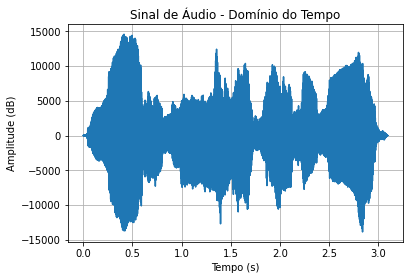

In [17]:
tempo = np.arange(0,dur,1/fs)
plt.plot(tempo,Audiodata)
plt.title("Sinal de Áudio - Domínio do Tempo")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude (dB)")
plt.grid()
plt.show()

In [18]:
Audio(AudioName)

Podemos mudar um pouco as características do nosso sinal:

In [19]:
Audio(Audiodata, rate=2*fs)

In [20]:
Audio(Audiodata, rate=0.75*fs)

Vamos aplicar a fast-fourier transform no nosso sinal, passando do domínio do tempo para o domínio da frequência.

Assim, vamos analisar o conteúdo de frequências do sinal, a distribuição de frequências do nosso áudio.

Text(0, 0.5, 'Amplitude')

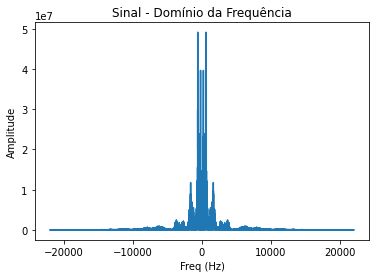

In [21]:
yf = fft(Audiodata)
xf = fftfreq(N,1/fs)

plt.plot(xf,abs(yf))
plt.title("Sinal - Domínio da Frequência")
plt.xlabel('Freq (Hz)')
plt.ylabel('Amplitude')

Usando a ``rfft``

Text(0, 0.5, 'Amplitude')

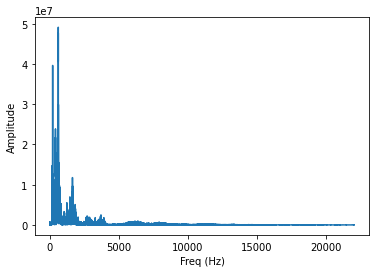

In [22]:
ryf = rfft(Audiodata)
rxf = rfftfreq(N,1/fs)

plt.plot(rxf,abs(ryf))
plt.xlabel('Freq (Hz)')
plt.ylabel('Amplitude')

Na próxima aula, iremos estudar a aplicação dos filtros. O filtro consiste em retirar conteúdos de frequência do nosso sinal.

Vamos ver um exemplo de como aplicar um filtro:

In [23]:
Filter_BP = np.ones(N)
Filter_BP[abs(xf)>1000] = 0 #retirando todas as frequências acima de 1000
AudioFreqFilter = yf*Filter_BP

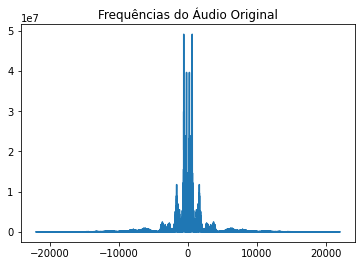

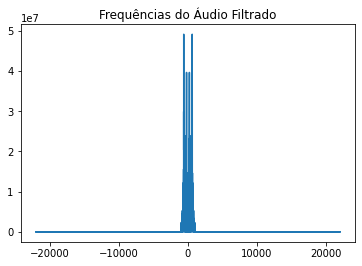

In [24]:
plt.plot(xf,abs(yf))
plt.title("Frequências do Áudio Original")
plt.show()

plt.plot(xf,abs(AudioFreqFilter))
plt.title("Frequências do Áudio Filtrado")
plt.show()

Para escutar o áudio filtrado, devemos voltar para o domínio do tempo, usando a transformada de Fourier inversa.

In [25]:
from scipy.fft import ifft

AudiodataFilter = ifft(AudioFreqFilter)

Vamos comparar o áudio original com o áudio filtrado no domínio do tempo. Perceba como a diferença é mais nítida no domínio da frequência. 

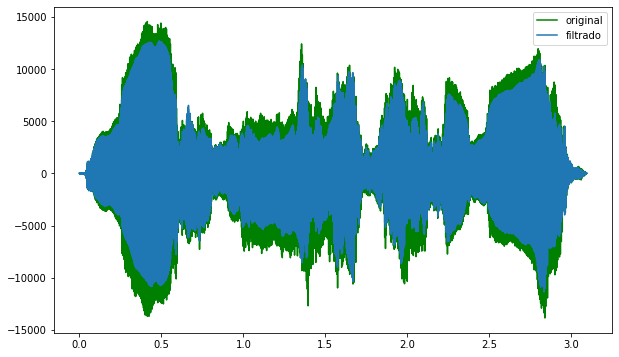

In [31]:
plt.figure(figsize=(10,6))
plt.plot(tempo,Audiodata,'g',label="original")
plt.plot(tempo,AudiodataFilter,label="filtrado")
plt.legend()
plt.show()

Vamos escutar os áudios. Consegue perceber alguma diferença?

In [32]:
AudiodataOut = np.int16(np.real(AudiodataFilter))
AudioNameOut = "../Dados/vignesh_HP_filtered.wav"

wavfile.write(AudioNameOut,fs,np.real(AudiodataOut))
print("Áudio Filtrado")
Audio(AudioNameOut)

Áudio Filtrado


In [33]:
print("Áudio Original")
Audio(AudioName)

Áudio Original


*********

## 4. Dado de Sismologia

Vamos usar a biblioteca ``obspy`` para analisar um dado sismológico. 

In [ ]:
!pip install obspy

In [ ]:
!git clone https://github.com/GuilhermeZakarewicz/AnaliseSinais

In [ ]:
cd AnaliseSinais/Aulas

In [34]:
import obspy
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft,ifft,rfft,irfft,fftfreq
from scipy.io import wavfile
from IPython.display import Audio # biblioteca para escutar os audios no notebook
from pydub import AudioSegment # Biblioteca para converter formatos de áudio
from scipy.io.wavfile import write

st = obspy.read("../Dados/2017-09-08_04492141_BR_PRPB_E.sac")

D:\Arquivos\anaconda3\lib\site-packages\pkg_resources\__init__.py:123: PkgResourcesDeprecationWarning: 4.0.0-unsupported is an invalid version and will not be supported in a future release
  warnings.warn(


In [38]:
type(st)

obspy.core.stream.Stream

In [39]:
tr=st[0] 
tr.stats

         network: BR
         station: PRPB
        location: 
         channel: HHE
       starttime: 2017-09-08T04:35:00.000781Z
         endtime: 2017-09-08T06:00:00.000781Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 510001
           calib: 1.0
         _format: SAC
             sac: AttribDict({'delta': 0.01, 'depmin': -181241.0, 'depmax': 185644.0, 'scale': 1.0, 'b': 16499.55, 'e': 21599.55, 'depmen': -12.603183, 'nzyear': 2017, 'nzjday': 251, 'nzhour': 0, 'nzmin': 0, 'nzsec': 0, 'nzmsec': 450, 'nvhdr': 6, 'npts': 510001, 'iftype': 1, 'iztype': 9, 'leven': 1, 'lpspol': 1, 'lovrok': 1, 'lcalda': 0, 'kstnm': 'PRPB', 'kcmpnm': 'HHE', 'knetwk': 'BR'})

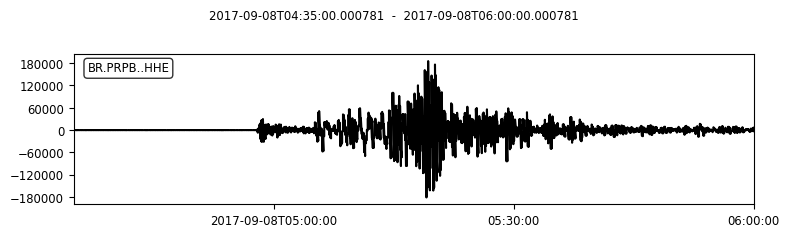

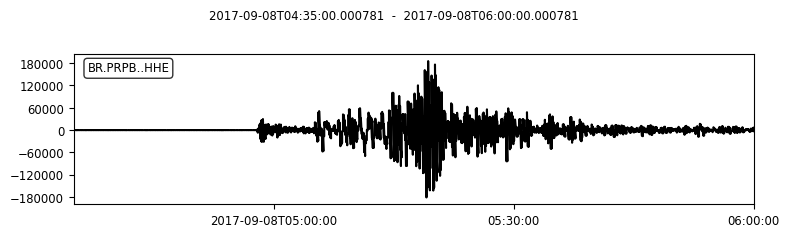

In [41]:
plt.rcParams['figure.figsize'] = (12,4) 
tr.plot()

Vamos pegar algumas informações diretamente do dado.

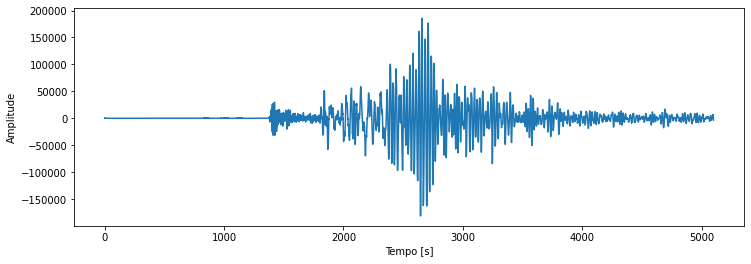

In [42]:
dado = tr.data 
N = tr.stats.npts
dt = tr.stats.delta
fs = tr.stats.sampling_rate

tempo = np.arange(0,N*dt,dt)

plt.plot(tempo,dado)
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")
plt.show()

Analisando o conteúdo de frequências do nosso sinal

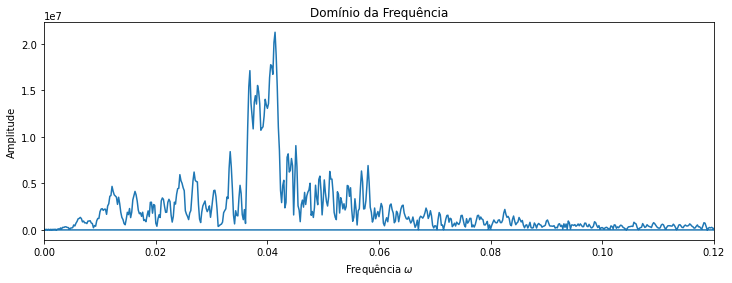

In [43]:
sis_freq=fft(dado)
freq=fftfreq(N,dt)

plt.plot(freq,abs(sis_freq)*dt)
plt.title("Domínio da Frequência")
plt.xlim(0,0.12)
plt.xlabel("Frequência $\omega$")
plt.ylabel("Amplitude")
plt.show()

O ``obspy`` permite visualizar o espectrograma do nosso sinal. Ou seja, podemos analisar a variação das amplitudes das frequências no tempo. 

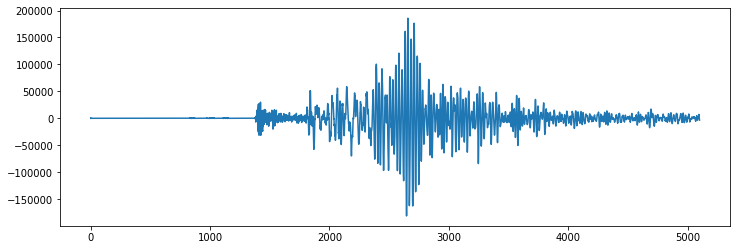

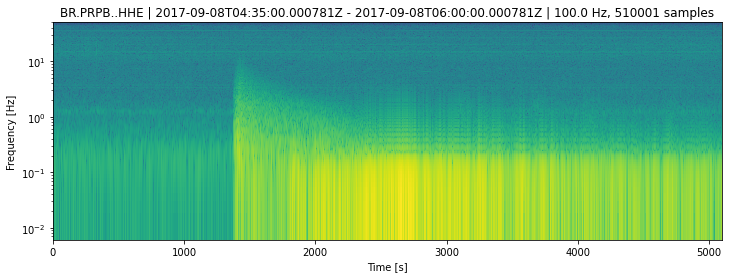

In [66]:
plt.plot(tempo,dado)
plt.show()

tr.spectrogram(per_lap=.5, wlen=10, log=True, dbscale=True)

Podemos filtrar nosso sinal da mesma forma

In [79]:
N = len(tr)
Filter_BP = np.ones(N)
Filter_BP[abs(freq)<0.045] = 0
filtered = sis_freq*Filter_BP

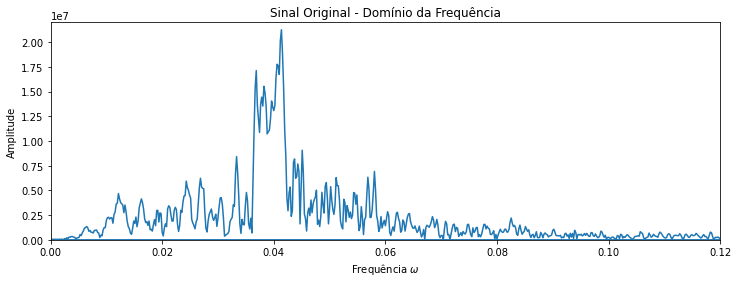

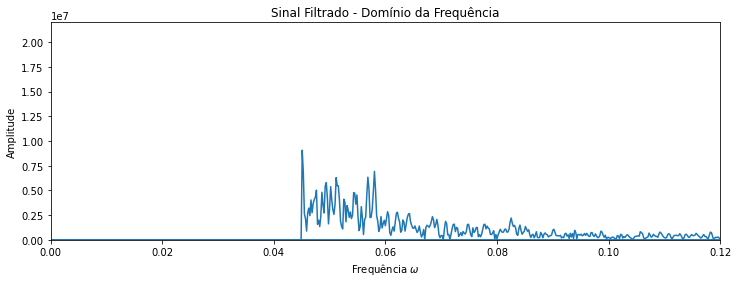

In [80]:
plt.plot(freq,abs(sis_freq)*dt)
plt.title("Sinal Original - Domínio da Frequência")
plt.xlim(0,0.12)
plt.ylim(0,2.2*1e7)
plt.xlabel("Frequência $\omega$")
plt.ylabel("Amplitude")
plt.show()

plt.plot(freq,abs(filtered)*dt)
plt.title("Sinal Filtrado - Domínio da Frequência")
plt.xlim(0,0.12)
plt.ylim(0,2.2*1e7)
plt.xlabel("Frequência $\omega$")
plt.ylabel("Amplitude")
plt.show()

Voltando para o domínio do tempo

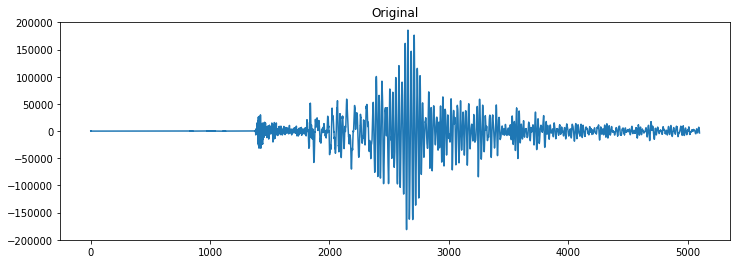

D:\Arquivos\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


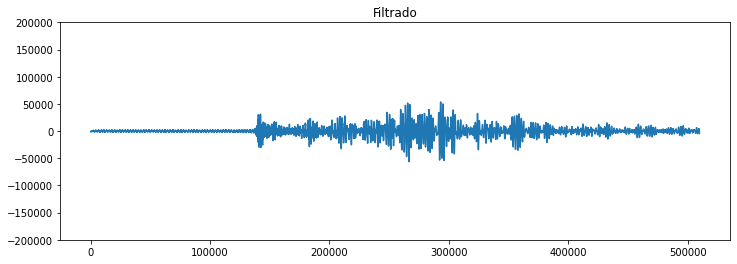

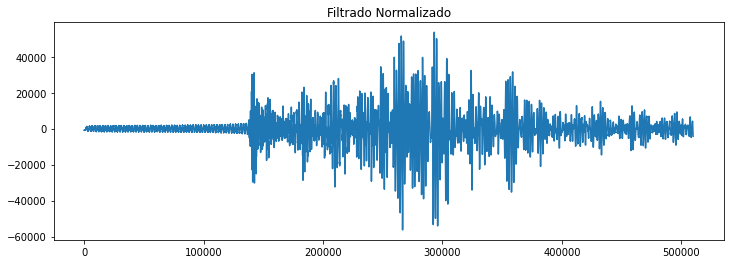

In [81]:
dado_filtrado = ifft(filtered)

plt.plot(tempo,dado)
plt.title("Original")
plt.ylim([-200000,200000])
plt.show()

plt.plot(dado_filtrado)
plt.title("Filtrado")
plt.ylim([-200000,200000])
plt.show()

plt.plot(dado_filtrado)
plt.title("Filtrado Normalizado")
plt.show()

Será que é possível criar um arquivo de áudio a partir do nosso dado sismológico?

Com algumas modificações que aprendemos hoje (filtro e mudança do conteúdo de frequências), podemos fazer isso

In [63]:
N = len(tr)
Filter_BP = np.ones(N)
Filter_BP[abs(freq)>100] = 0 
AudioFreqFilter = sis_freq*Filter_BP

In [64]:
AudiodataFilter = np.fft.ifft(AudioFreqFilter)
len_audiodata = len(AudiodataFilter)
AudiodataFilter = AudiodataFilter[0:len_audiodata//3]

AudiodataOut = np.int16(np.real(AudiodataFilter))
AudioNameOut = "../Dados/sisOut.wav"

wavfile.write(AudioNameOut,int(fs*800),np.real(AudiodataOut))

Audio(AudioNameOut)